In [1]:
# Let's start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("winequality-red.csv")  # read the data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# Any missing values?

data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

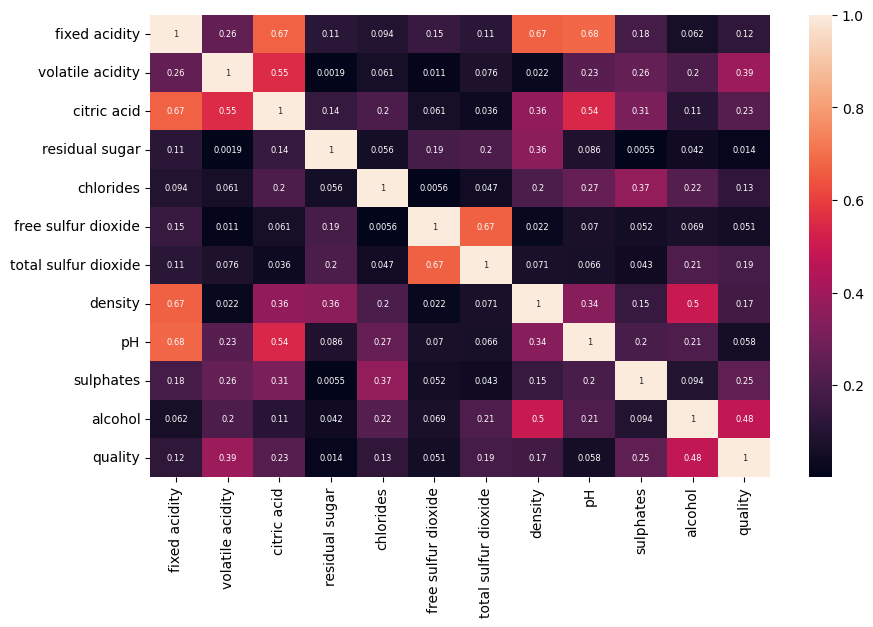

In [6]:
df_corr = data.corr().abs() # This code will get the coefficient of one variable vs all other variable (Relationship)

plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':6})
plt.show()

In [8]:
X = data.drop(columns = ['quality'])
y = data['quality']

In [9]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=41)

In [10]:
# Write one function and call as many as time to check accuracy_score of different models
def metric_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n=================Train Result===================================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n===========================Test Result=====================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%")
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))##model confidence/accuracy

In [11]:
# Model initiation
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
# Call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True)  # This is for training score 
            
metric_score(clf,x_train,x_test,y_train,y_test, train=False)  # This is for testing score


=================Train Result===================================
Accuracy Score: 100.00%

===========================Test Result=====================================
Accuracy Score: 59.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.08      0.09      0.09        11
           5       0.65      0.65      0.65       157
           6       0.62      0.64      0.63       168
           7       0.55      0.47      0.51        57
           8       0.20      0.25      0.22         4

    accuracy                           0.60       400
   macro avg       0.35      0.35      0.35       400
weighted avg       0.60      0.60      0.60       400



In [15]:
# We are tuning four Important hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(10,15),            # The maximum depth of tree.
    'min_samples_leaf': range(2,6),       # The minimum number of samples required to be at a leaf node.
    'min_samples_split': range(3,8),      # The minimum number of samples required to split an internal node
    'max_leaf_nodes': range(20,50)        # If None then unlimited number of leaf nodes
}

In [16]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5)  # Use all the cores in your system. For performance improvement

In [17]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(20, 50),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [18]:
best_parameters =grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 34, 'min_samples_leaf': 4, 'min_samples_split': 4}


In [19]:
# Initiate DecisionTreeClassifier with new parameters and train
clf = DecisionTreeClassifier(criterion = 'gini', min_samples_split =4, max_depth=10, min_samples_leaf=4,max_leaf_nodes=34)

# Train the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=34, min_samples_leaf=4,
                       min_samples_split=4)

In [20]:
# Call the function and pass dataset to check train and test score
metric_score(clf,x_train,x_test,y_train,y_test, train=True)  # This is for training score 
            
metric_score(clf,x_train,x_test,y_train,y_test, train=False)  # This is for testing score


=================Train Result===================================
Accuracy Score: 68.39%

===========================Test Result=====================================
Accuracy Score: 58.75%

 
 Test Classification Report 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11
           5       0.60      0.80      0.69       157
           6       0.61      0.42      0.50       168
           7       0.53      0.70      0.60        57
           8       0.00      0.00      0.00         4

    accuracy                           0.59       400
   macro avg       0.29      0.32      0.30       400
weighted avg       0.57      0.59      0.56       400



In [21]:
# Prediction for confusion matrix
y_pred = clf.predict(x_test)

# Converting into DataFrame to understand this better
pd.DataFrame(confusion_matrix(y_test,y_pred), columns= ['Q3', 'Q4', 'Q5','Q6','Q7','Q8'], index=['Q3', 'Q4', 'Q5','Q6','Q7','Q8'])

,Q3,Q4,Q5,Q6,Q7,Q8
Q3,0,0,2,1,0,0
Q4,0,0,9,2,0,0
Q5,0,0,125,25,7,0
Q6,0,2,70,70,26,0
Q7,0,1,1,15,40,0
Q8,0,0,0,1,3,0
